11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


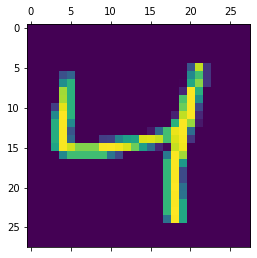

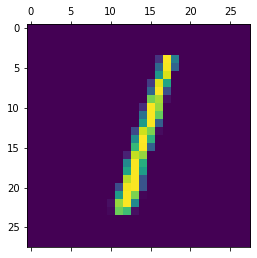

In [ ]:
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)

import matplotlib.pyplot as plt
plt.matshow(x_train[2])
plt.matshow(x_test[2])

In [ ]:
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.metrics import classification_report

x_train = np.reshape(x_train, (60000,784))
x_test = np.reshape(x_test, (10000,784))
clf = MLPClassifier(hidden_layer_sizes=(10,5,), activation="relu", verbose=True, solver="adam").fit(x_train, y_train)
pred = clf.predict(x_test)
print(classification_report(y_test, pred))

Iteration 1, loss = 2.75107744
Iteration 2, loss = 2.13061975
Iteration 3, loss = 2.01473109
Iteration 4, loss = 1.96907807
Iteration 5, loss = 1.94282553
Iteration 6, loss = 1.92294387
Iteration 7, loss = 1.90663756
Iteration 8, loss = 1.88460618
Iteration 9, loss = 1.85029859
Iteration 10, loss = 1.82163324
Iteration 11, loss = 1.80026629
Iteration 12, loss = 1.76648482
Iteration 13, loss = 1.46958592
Iteration 14, loss = 1.31348953
Iteration 15, loss = 1.20286617
Iteration 16, loss = 1.07144732
Iteration 17, loss = 0.92759783
Iteration 18, loss = 0.74762668
Iteration 19, loss = 0.66118934
Iteration 20, loss = 0.62588349
Iteration 21, loss = 0.60280438
Iteration 22, loss = 0.58169159
Iteration 23, loss = 0.56672803
Iteration 24, loss = 0.54857966
Iteration 25, loss = 0.53951324
Iteration 26, loss = 0.52696069
Iteration 27, loss = 0.51807793
Iteration 28, loss = 0.51035864
Iteration 29, loss = 0.50686983
Iteration 30, loss = 0.50017507
Iteration 31, loss = 0.49427367
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


              precision    recall  f1-score   support

           0       0.86      0.96      0.90       980
           1       0.95      0.97      0.96      1135
           2       0.91      0.90      0.90      1032
           3       0.92      0.88      0.90      1010
           4       0.92      0.88      0.90       982
           5       0.91      0.81      0.86       892
           6       0.92      0.94      0.93       958
           7       0.89      0.87      0.88      1028
           8       0.81      0.81      0.81       974
           9       0.83      0.88      0.85      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(10, input_dim=784, activation="relu"))
model.add(layers.Dense(5, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=tf.keras.metrics.Accuracy()
)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10, dtype='int32')
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10, dtype='int32')

checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

model.fit(x_train, y_train, batch_size=10, epochs=5, shuffle=True, validation_split=0.3, callbacks=[model_checkpoint_callback])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 7,965
Trainable params: 7,965
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
4200/4200 [==============================] - 10s 2ms/step - loss: 2.1515 - accuracy: 0.0060 - val_loss: 1.7125 - val_accuracy: 0.0132
Epoch 2/5
4200/4200 [==============================] - 9s 2ms/step - loss: 1.6516 - accuracy: 0.0060 - val_loss: 1.4835 - val_accuracy: 0.0000e+00
Epoch 3/5
4200/4200 [======

In [ ]:
pred = clf.predict(x_test)
y_test = np.argmax(y_test, axis=1)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90       980
           1       0.95      0.97      0.96      1135
           2       0.91      0.90      0.90      1032
           3       0.92      0.88      0.90      1010
           4       0.92      0.88      0.90       982
           5       0.91      0.81      0.86       892
           6       0.92      0.94      0.93       958
           7       0.89      0.87      0.88      1028
           8       0.81      0.81      0.81       974
           9       0.83      0.88      0.85      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
model.load_weights(checkpoint_filepath)